# Универсальный метод треугольников

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import sys

import scipy.stats as sts

from numpy.linalg import norm

#sys.path.insert(0, "../Zeudel, Gauss methods/")
from uigm import AdaptiveFDA, UniversalFDA, Gradient

plt.rcParams['figure.figsize'] = (16, 10)

In [2]:
plt.rcParams['figure.figsize'] = (16, 10)

In [23]:
A = np.array([[1, 2], [2, 3]])
b = np.array([1, 2])
x_expl = np.array([1, 0])
x0_rn = np.array([0.1, 0.2])
x0_smp = np.array([0.1, 0.2])
eps = 0.05

# ||Ax - b||^2
def func1(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)**2


def gradFunc1(x, func1, eps = 0) :
    return 2*A.transpose() @ (A @ x - b)

def func2(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)

def gradFunc2(x, func2, eps = 0) :
    if np.array_equal(A @ x - b, np.zeros((len(b)))) :
        return 0
    else :
        return A.transpose() @ (A @ x - b) / norm(A @ x - b, ord = 2)
    
def func3(x):
    return func1(x) + func2(x)

def gradFunc3(x, func3, eps = 0):
    return gradFunc1(x, func3, eps) + gradFunc2(x, func3, eps)

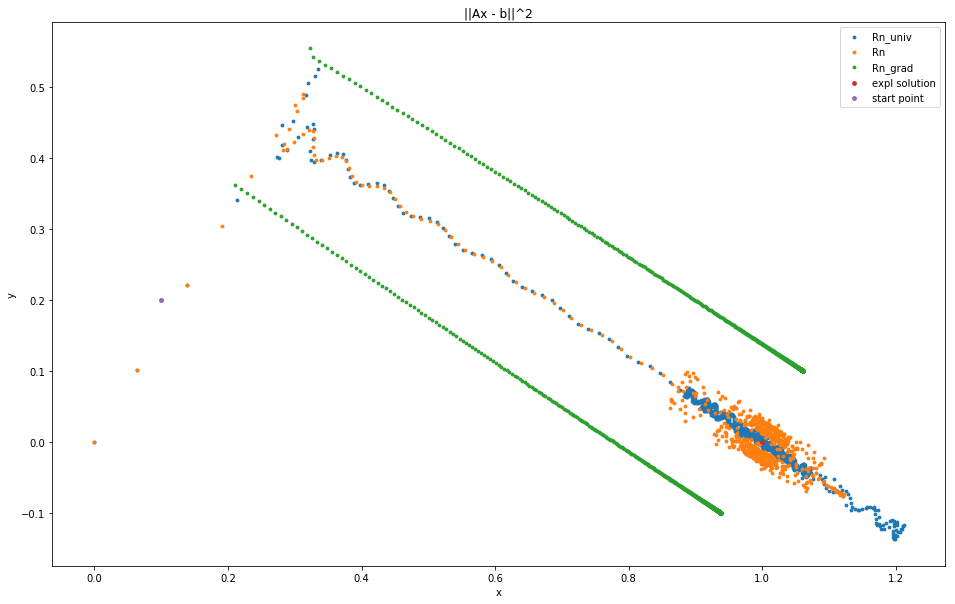

In [24]:
L = 36

xk_rn_adapt   = AdaptiveFDA(func3, x0_rn, eps, grad = gradFunc3, set_type = "rn")
xk_rn_univ   = UniversalFDA(func3, x0_rn, eps, grad = gradFunc3, set_type = "rn")
xk_grad = Gradient(func3, x0_rn, eps, L, grad = gradFunc3, set_type = "rn")

plt.scatter([xk_rn_univ[i][0] for i in range(0, len(xk_rn_univ))], [xk_rn_univ[i][1] for i in range(0, len(xk_rn_univ))], label = "Rn_univ", s=8)
plt.scatter([xk_rn_adapt[i][0] for i in range(0, len(xk_rn_adapt))], [xk_rn_adapt[i][1] for i in range(0, len(xk_rn_adapt))], label = "Rn", s=8)
plt.scatter([xk_grad[i][0] for i in range(0, len(xk_grad))], [xk_grad[i][1] for i in range(0, len(xk_grad))], label = "Rn_grad", s=8)

plt.scatter(x_expl[0], x_expl[1], label = "expl solution", s = 14)
plt.scatter(x0_rn[0],  x0_rn[1],  label = "start point",   s = 14)

plt.xlabel("x")
plt.ylabel("y")
plt.title("||Ax - b||^2")
plt.legend()

In [25]:
def ln_diff(x):
    return np.log((func1(x) - func1(x_expl))/(func1(x0_rn) - func1(x_expl)))

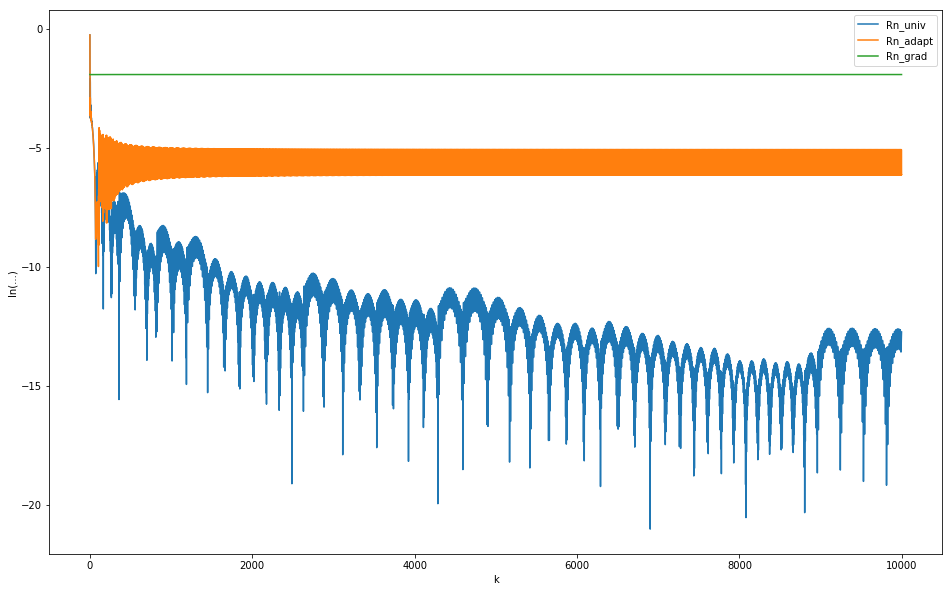

In [26]:
plt.plot([ln_diff(xk_rn_univ[i]) for i in range(3, len(xk_rn_univ))], label = "Rn_univ")
plt.plot([ln_diff(xk_rn_adapt[i]) for i in range(3, len(xk_rn_adapt))], label = "Rn_adapt")
plt.plot([ln_diff(xk_grad[i]) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [27]:
print("Универсальный метод: ", "f(x) = ", func3(xk_rn_univ[-1]))
print("Адаптивный метод: ", "f(x) = ", func3(xk_rn_adapt[-1]))
print("Градиентный метод: ", "f(x) = ", func3(xk_grad[-1]))

Универсальный метод:  f(x) =  0.0022302733711580076
Адаптивный метод:  f(x) =  0.06417057728533807
Градиентный метод:  f(x) =  0.7438366274945819


In [46]:
N = 500 # размерность пространства

# генерируем случайные A и b
uniform_rv = sts.uniform(-100, 200) # Равномерное распределение от -100 до 100
A = uniform_rv.rvs(size = (N, N))
b = uniform_rv.rvs(size = N)
x0_rn = np.zeros(N)

x_expl = np.linalg.inv(A) @ b

L = max(abs(np.linalg.eig(2 * A.transpose() @ A)[0]))


In [47]:
xk_rn_adapt   = AdaptiveFDA(func2, x0_rn, eps, grad = gradFunc2, set_type = "rn")
xk_rn_univ   = UniversalFDA(func2, x0_rn, eps, grad = gradFunc2, set_type = "rn")
xk_grad = Gradient(func2, x0_rn, eps, L, grad = gradFunc2, set_type = "rn")

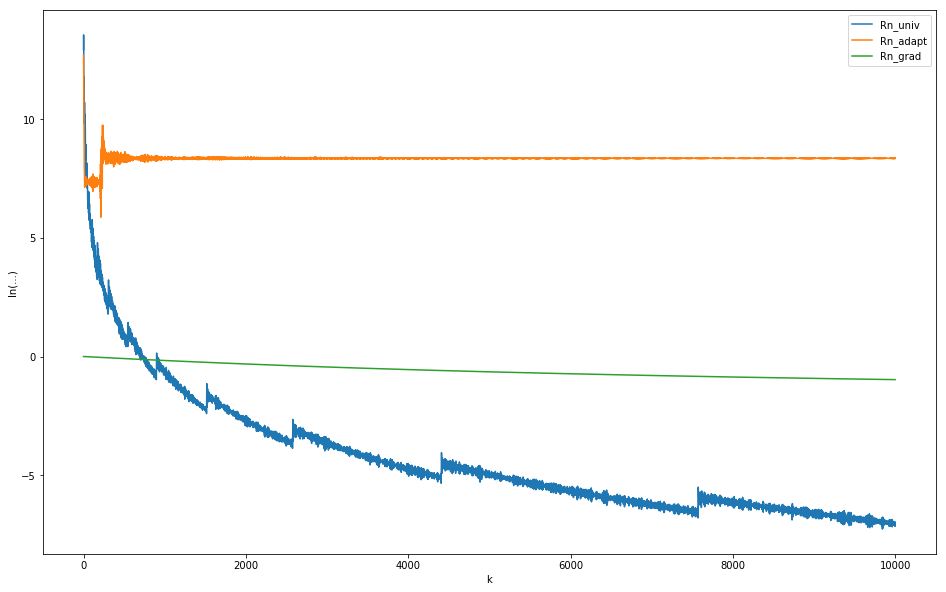

In [48]:
plt.plot([ln_diff(xk_rn_univ[i]) for i in range(3, len(xk_rn_univ))], label = "Rn_univ")
plt.plot([ln_diff(xk_rn_adapt[i]) for i in range(3, len(xk_rn_adapt))], label = "Rn_adapt")
plt.plot([ln_diff(xk_grad[i]) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [49]:
print("Универсальный метод: ", "f(x) = ", func2(xk_rn_univ[-1]))
print("Адаптивный метод: ", "f(x) = ", func2(xk_rn_adapt[-1]))
print("Градиентный метод: ", "f(x) = ", func2(xk_grad[-1]))

Универсальный метод:  f(x) =  38.26141180816275
Адаптивный метод:  f(x) =  85614.45343630147
Градиентный метод:  f(x) =  804.9621813830389
